 # Лабораторная работа №3
 ## Вариант 19

$
y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

## Параметры равномерного распределения
![](./find-a-b.png)

In [1]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from math import floor, pow

max_n = 30
a = -2
b = 4
COUNT_INTERVAL = 5
alpha = 0.01

## Теоретический закон распределения
![](./analytical.jpg)

*Опечатка, F(y)*

![](./analytical1.jpg)

In [2]:
def func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

borderA = func(a)
borderB = func(b)

def analytical_func_densiny(y):    
    if y >= borderA and y <= borderB:
        return (1 / 2) * pow(y, 2)
    return 0

def analytical_func_dist(y):    
    if y >= borderA and y <= borderB:
        return (1 / 6) * (pow(y, 3) - a)

    return 0 if y < borderA else 1


def add_analytical_func_densiny_to_plot():
    x_axis = np.linspace(func(a), func(b), 1000)
    y_axis = [analytical_func_densiny(i) for i in x_axis]
    plt.step(x_axis, y_axis, label="analytical function densiny")
    plt.legend()

def add_analytical_func_dist_to_plot():
    x_axis = np.linspace(func(a), func(b), 1000)
    y_axis = [analytical_func_dist(i) for i in x_axis]
    plt.step(x_axis, y_axis, label="analytical function distribution")
    plt.legend()

## Построение вариационного ряда

In [3]:
def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(func(x))
    return sorted(result)

x_sample = get_x_sample(a, b, max_n)

# Вариационный ряд y_sample
y_sample = get_y_sample(x_sample)

## Эмпирическая функция распределения

In [4]:
def get_empiric_function_dist_values(y_sample):
    all = len(y_sample)
    y_axis = [0] + [cur / all for cur in range(all)] + [1]
    x_axis = [func(a)] + [y for y in y_sample] + [func(b)]
    return x_axis, y_axis

def add_empiric_function_to_plot(y_sample):
    x_axis, y_axis = get_empiric_function_dist_values(y_sample)
    plt.step(x_axis, y_axis, label="empiric")
    plt.legend()

## Равновероятностный метод

In [5]:
def equal_chance_method(y_sample):
    count = len(y_sample)
    take_points = count / COUNT_INTERVAL
    interval_count = count / COUNT_INTERVAL
    representative_eps = 6
    current = 0
    result = []

    while True:
        left = current
        right = round(take_points)

        if right >= len(y_sample):
            right = len(y_sample) - 1

        if abs(right - left + 1 - interval_count) <= representative_eps:
            result.append((y_sample[left], y_sample[right], (right - left + 1) / (count * (y_sample[right] - y_sample[left]))))

        if right == count - 1:
            break

        current = right + 1
        
        take_points += interval_count

    return result

def add_equal_chance_method_to_plot(values):
    y_axis = []
    x_axis = []
    for i in values:
        y_axis.append(i[0])
        y_axis.append(i[1])
        x_axis.append(i[2])
        x_axis.append(i[2])
    plt.step(y_axis, x_axis, label="equal chance gistogram")
    plt.legend()


## Выдвижение гипотезы
![](./analytical1.jpg)

## Критерий "Хи Квадрат" Пирсона

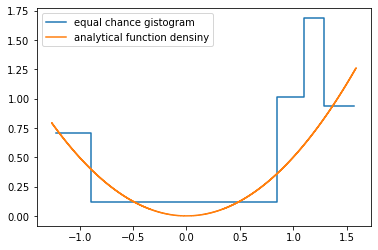

In [6]:
def get_hi_deviation(values):
    hi_deviation = 0
    s = 0
    empiric_prob = (1 / COUNT_INTERVAL)

    for i in values:
        diff = analytical_func_dist(i[1]) - analytical_func_dist(i[0])
        hi_deviation += (pow(diff - empiric_prob, 2)) / diff
        s += diff

    hi_deviation *= max_n
    return hi_deviation


values = equal_chance_method(y_sample)
add_equal_chance_method_to_plot(values)
add_analytical_func_densiny_to_plot()
plt.show()


In [7]:
k = COUNT_INTERVAL - 1
hi = get_hi_deviation(values)
permissible = 29.1
print('Число степеней свободы: %i' % k)
print('Уровень значимости: %f' % alpha)
print('Критерий пирсона хи квадрат: %f' % hi)
print('Допустимое табличное значение: %f' % permissible)

Число степеней свободы: 4
Уровень значимости: 0.010000
Критерий пирсона хи квадрат: 7.086117
Допустимое табличное значение: 29.100000


## Критерий Колмогорова

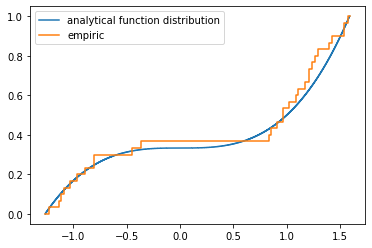

In [8]:
add_analytical_func_dist_to_plot()
add_empiric_function_to_plot(y_sample)

In [13]:
def get_dmax(x_axis, y_axis):
    result = 0
    for i in range(1, len(x_axis)):
        result = max(abs(analytical_func_dist(x_axis[i - 1]) - y_axis[i]), result)
        result = max(abs(analytical_func_dist(x_axis[i]) - y_axis[i]), result)
    
    result = max(abs(analytical_func_dist(x_axis[0]) - y_axis[0]), result)
    return result

In [14]:
xx, yy = get_empiric_function_dist_values(y_sample)
dmax = get_dmax(xx, yy)
print('Максимальное отклонение %f' % dmax)
print('Эмпирическое %f' % (pow(max_n, 1 / 2) * dmax))
print('Табличное %f' % (0.2972 * pow(max_n, 1 / 2)))


Максимальное отклонение 0.143750
Эмпирическое 0.787353
Табличное 1.627831


## Критерий мизоса

In [16]:
def get_mizos(y_sample):
    result = 1 / (12 * len(y_sample))
    for i in range(len(y_sample)):
        result += pow(analytical_func_dist(y_sample[i]) - (i + 0.5) / len(y_sample), 2)
    return result

misoz = get_mizos(y_sample)
print('Эмпирическое значение критерия мизоса: %f' % misoz)
print('Табличное значение критерия мизоса: %f' % 0.744)

Эмпирическое значение критерия мизоса: 0.081984
Табличное значение критерия мизоса: 0.744000
